In [181]:
import matplotlib.pyplot as plt

## Line drawing algorithm

In [182]:
def draw_line(x1, y1, x2, y2):
    
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    
    is_steep = abs(y2 - y1) > abs(x2 - x1)
    
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    
    p = 2 * dy - dx
    
    x_values = []
    y_values = []
    x = x1
    y = y1
    
    while True:
        if is_steep:
            x_values.append(y)
            y_values.append(x)
        else:
            x_values.append(x)
            y_values.append(y)
        
        if x == x2 and y == y2:
            break
            
        if p < 0:
            p += 2 * dy
        else:
            y += sy
            p += 2 * dy - 2 * dx
        
        x += sx
        
    return x_values, y_values

## Circle drawing algorithm

In [183]:
def eight_way_symmetric_plot(cx, cy, x, y):
    points = []
    points.append((x + cx, y + cy))
    points.append((x + cx, -y + cy))
    points.append((-x + cx, -y + cy))
    points.append((-x + cx, y + cy))
    
    points.append((y + cx, x + cy))
    points.append((y + cx, -x + cy))
    points.append((-y + cx, -x + cy))
    points.append((-y + cx, x + cy))
    
    pointX, pointY = zip(*points)
    
    pointX = list(pointX)
    pointY = list(pointY)
    
    return pointX, pointY


def circle_drawing(cx, cy, r):
    
    x = 0
    y = r 
    p = 3 - 2 * r
    
    x_values = []
    y_values = []
    
    pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
    
    x_values.append(pointX)
    y_values.append(pointY)
    
    while x <= y:
        
        print(f"p : {p}")
        
        x += 1
        
        if p < 0:
            p += 4 * x + 6
        else:
            y -= 1
            p += 4 * (x - y) + 10
            
        pointX, pointY = eight_way_symmetric_plot(cx, cy, x, y)
        
        x_values.append(pointX)
        y_values.append(pointY)
        
    
    return x_values, y_values

## Values to be added

In [184]:
values = []

## Base Line

In [185]:
# baseline
values.append(draw_line(-35, -30, 35, -30))
values.append(draw_line(-40, -25, 40, -25))
values.append(draw_line(-45, -20, 45, -20))
values.append(draw_line(-45, -20, -35, -30))
values.append(draw_line(45, -20, 35, -30))



## Left Side

In [186]:
values.append(draw_line(-30, 15, -30, -20))
values.append(draw_line(-20, 15, -20, -20))
values.append(draw_line(-30, 15, -20, 15))

## Right Side

In [187]:
values.append(draw_line(20, 15, 20, -20))
values.append(draw_line(30, 15, 30, -20))
values.append(draw_line(20, 15, 30, 15))

## Circle

In [188]:
circleX, circleY = circle_drawing(0, 0, 12)

p : -21
p : -11
p : 3
p : -19
p : 3
p : -7
p : 23
p : 25
p : 35


In [189]:
def draw_circle():
    plt.plot(circleX, circleY, color = 'red')

## Center

In [190]:
# left line
values.append(draw_line(-10, 15, -10, 6))
values.append(draw_line(-10, -6, -10, -20))

# right line
values.append(draw_line(10, 15, 10, 6))
values.append(draw_line(10, -6, 10, -20))

# middle line
values.append(draw_line(0, -12, 0, -20))
values.append(draw_line(0, 15, 0, 12))

# Three bars
values.append(draw_line(0, 25, -10, 15))
values.append(draw_line(10, 25, 0, 15))
values.append(draw_line(20, 25, 10, 15))


values.append(draw_line(0, 25, 20, 25))

## Unpacking

In [191]:
x_values, y_values = zip(*values)

x_values = [item for sublist in x_values for item in (sublist + [None])]
y_values = [item for sublist in y_values for item in (sublist + [None])]

## Drawing

In [192]:
def plot_func():
    plt.plot(x_values, y_values, color = 'black')
    draw_circle()
    plt.title("Practice")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.grid("True")

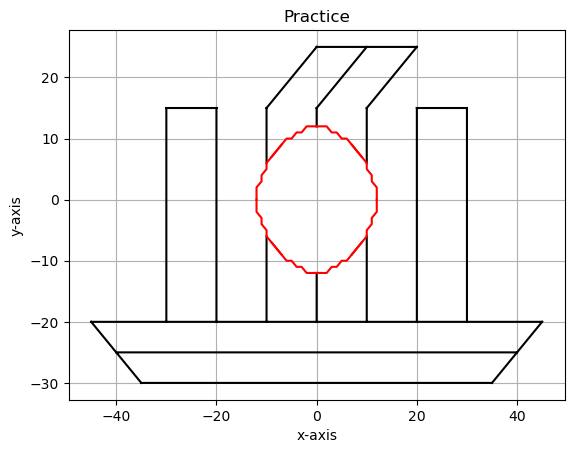

In [193]:
plot_func()